In [11]:
import pandas as pd

graduation_data = pd.read_csv('../../outputs/Assignment_3/final_selected_features_data.csv')

graduation_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC8,PC10,PC14,PC27,Target
0,-4.284330,2.545758,-0.362459,-0.293426,-1.070150,-0.935453,0.243171,0.587523,-0.971043,0.183837,0
1,-0.023672,0.202456,1.317741,-0.590291,0.358463,0.790290,-0.766869,-0.306493,-0.009283,-0.270085,1
2,0.390637,-2.099125,-0.730008,0.312819,-0.707416,1.041611,-0.843357,-1.374854,0.572176,-0.213702,2
3,-4.334493,4.573970,1.384275,0.157866,-0.723131,-3.090106,0.632537,-1.146945,0.962375,-0.400390,0
4,1.183349,-2.155852,2.091475,2.275112,0.143244,0.333923,0.103694,0.104201,0.836742,-0.141173,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode target labels and split dataset into features and target variable
graduation_data['Target'] = LabelEncoder().fit_transform(graduation_data['Target'])

# Ensure the target variable is binary (0 or 1)
if len(graduation_data['Target'].unique()) > 2:
	graduation_data = graduation_data[graduation_data['Target'] <= 1]

X = graduation_data.drop(columns=['Target'])
y = graduation_data['Target']

# Standardize features and split the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize a dictionary to store the results
results = {}

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
results['Decision Tree'] = accuracy_score(y_test, y_pred_dt)

# Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)
results['Naive Bayes'] = accuracy_score(y_test, y_pred_nb)

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
results['Random Forest'] = accuracy_score(y_test, y_pred_rf)

# Support Vector Machine with RBF Kernel
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
results['SVM with RBF Kernel'] = accuracy_score(y_test, y_pred_svm)

# Neural Network Model (MLP)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_clf.fit(X_train, y_train)
y_pred_mlp = mlp_clf.predict(X_test)
results['Neural Network'] = accuracy_score(y_test, y_pred_mlp)

# Display results for all algorithms
results


c:\Users\sep_j\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Decision Tree': 0.6628571428571428,
 'Naive Bayes': 0.7314285714285714,
 'Random Forest': 0.7485714285714286,
 'SVM with RBF Kernel': 0.7333333333333333,
 'Neural Network': 0.7409523809523809}

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define features and target variable
# Using all columns except 'Target' as features, and 'Target' as the label
X = graduation_data.drop(columns=['Target'])
y = graduation_data['Target']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree Classifier object
clf = DecisionTreeClassifier(random_state=1)

# Train Decision Tree Classifier
clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"Decision Tree Classifier Accuracy: {accuracy * 100:.2f}%")
print(f"Decision Tree Classifier F1 Score: {f1 * 100:.2f}%")


Decision Tree Classifier Accuracy: 71.05%
Decision Tree Classifier F1 Score: 70.99%


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
from scipy.stats import randint

# Define features and target variable
X = graduation_data.drop(columns=['Target'])
y = graduation_data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create Random Forest Classifier object
rf = RandomForestClassifier(random_state=1)

# Train the Random Forest Classifier
rf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = rf.predict(X_test)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"Random Forest Classifier Accuracy: {accuracy * 100:.2f}%")
print(f"Random Forest Classifier F1 Score: {f1 * 100:.2f}%")

# Randomized Search for hyperparameter tuning
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1, 20)
}
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5, random_state=1)
rand_search.fit(X_train, y_train)

# Best hyperparameters
best_rf = rand_search.best_estimator_
best_params = rand_search.best_params_
print("\nBest hyperparameters:", best_params)




Random Forest Classifier Accuracy: 76.86%
Random Forest Classifier F1 Score: 76.37%

Best hyperparameters: {'max_depth': 10, 'n_estimators': 253}


Actual Value: 0
Predicted Value: 0

Accuracy: 74.69670710571924
F1 Score: 75.03676415899653


c:\Users\sep_j\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


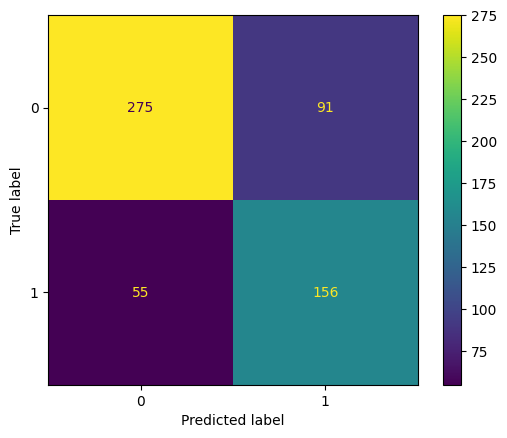

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define features and target variable
X = graduation_data.drop(columns=['Target'])
y = graduation_data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=125)

# Initialize Gaussian Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Predict a single output (for demonstration)
single_prediction = model.predict([X_test.iloc[6]])  # Predicting for the 6th item in X_test
print("Actual Value:", y_test.iloc[6])
print("Predicted Value:", single_prediction[0])

# Predict on the full test set
y_pred = model.predict(X_test)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nAccuracy:", accuracy * 100)
print("F1 Score:", f1 * 100)

# Create and plot confusion matrix with string labels directly from y_test
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [16]:
from sklearn.svm import SVC

# Define features and target variable
X = graduation_data.drop(columns=['Target'])
y = graduation_data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=125)

# Function to train and evaluate SVM with different kernels
def evaluate_svm_kernel(kernel_type, degree=None):
    if kernel_type == 'poly':
        model = SVC(kernel=kernel_type, degree=degree, C=1.0, random_state=125)
    else:
        model = SVC(kernel=kernel_type, C=1.0, random_state=125)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\nSVM with {kernel_type} kernel (degree={degree} if polynomial):")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")

# Evaluate SVM with different kernels
evaluate_svm_kernel('linear')
evaluate_svm_kernel('poly', degree=3)
evaluate_svm_kernel('rbf')
evaluate_svm_kernel('sigmoid')



SVM with linear kernel (degree=None if polynomial):
Accuracy: 76.29%
F1 Score: 76.70%

SVM with poly kernel (degree=3 if polynomial):
Accuracy: 70.00%
F1 Score: 70.55%

SVM with rbf kernel (degree=None if polynomial):
Accuracy: 75.71%
F1 Score: 76.03%

SVM with sigmoid kernel (degree=None if polynomial):
Accuracy: 67.43%
F1 Score: 67.31%


In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

X = graduation_data.drop(columns=['Target'])
y = graduation_data['Target']

# Scale features for neural network training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled dataset into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y, test_size=0.2, random_state=125)

# Define the neural network model (MLP) with one hidden layer of 100 neurons
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=125)

# Train the neural network
mlp.fit(X_train_nn, y_train_nn)

# Predict on the test set
y_pred_nn = mlp.predict(X_test_nn)

# Calculate accuracy and F1-score
accuracy_nn = metrics.accuracy_score(y_test_nn, y_pred_nn)
f1_nn = metrics.f1_score(y_test_nn, y_pred_nn, average='weighted')

print(f"Neural Network Accuracy: {accuracy_nn * 100:.2f}%")
print(f"Neural Network F1 Score: {f1_nn * 100:.2f}%")


Neural Network Accuracy: 73.43%
Neural Network F1 Score: 73.68%


c:\Users\sep_j\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
